In [68]:
import torch
import numpy as np

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

from tqdm import tqdm
import pandas as pd
import json

In [69]:
red  = (0.86, 0.08, 0.24)
blue = (0.12, 0.56, 1.0)
dblue = (0.10, 0.10, 0.44)
purple = (0.49, 0.32, 0.62)

In [27]:
with open("../logs/model_id.txt", "r") as f:
    ids = f.readlines()
ids = [i[:-1] for i in ids]

In [42]:
X = []
Y = []


for j in range(14):
    i = ids[-2-j]

    df = pd.read_csv(f"../logs/train_p038-t000_{i}.csv")

    with open(f"../logs/model_p038-t000_{i}.json") as f:
        info = json.load(f)

    K_max = info['K_max']
    X.append(K_max)
    Y.append(df.train_loss.to_numpy())

X = np.array(X)
Y = np.array(Y)

In [75]:
np.polyfit(np.log(X), np.log(Y[:, -1]/X), 1)

array([ 0.79783751, -2.87466912])

In [ ]:
ln(y) = ln(x)

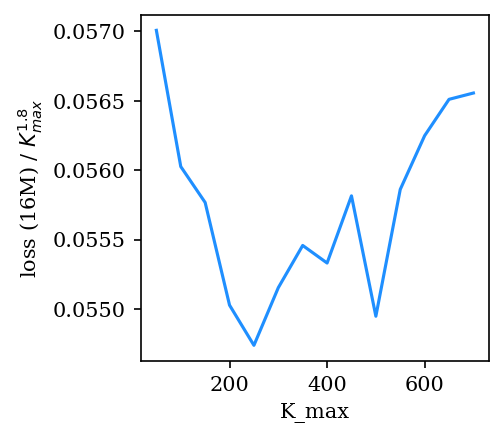

In [99]:
x = np.linspace(min(X), max(X), 100)
fig, ax = plt.subplots(1, 1, figsize=(3,3), dpi=150)
ax.plot(X, Y[:, -1]/X**1.8, color=blue)
# ax.plot(X, Y[:, -1]/X - np.exp(-2.87467) * X**0.7978, color=red)
# ax.scatter(X, Y[:, -1]/X, color=blue, s=5)
ax.set_xlabel('K_max')
ax.set_ylabel('loss (16M) / $K_{max}^{1.8}$')
# ax.set_xscale('log')
# ax.set_yscale('log')
# ax.set_xlim(10, 1_000)
# ax.set_ylim(10, 10_000)
plt.show()